In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from ipywidgets import interact, widgets
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets


In [3]:
percorso_file_csv = "C:\\Users\\matti\\Downloads\\heart_disease_uci.csv"
df = pd.read_csv(percorso_file_csv)
print(df.head())
df.shape

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


(920, 16)

In [11]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


### GRAFICO MALATI IN RELAZIONE CON ETA'

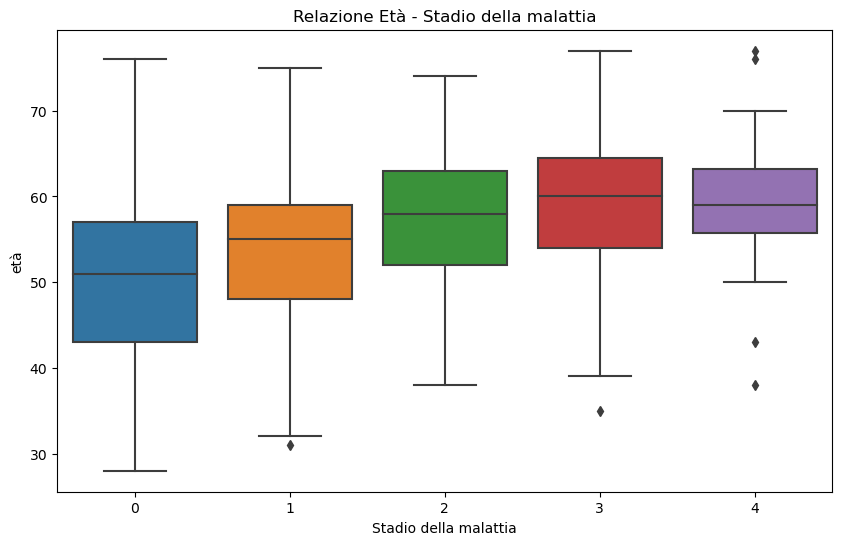

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num'], y=df['age'])
plt.title('Relazione Età - Stadio della malattia')
plt.xlabel('Stadio della malattia')
plt.ylabel('età')
plt.show()


### ANALISI:
#### Da questo grafico possiamo dedurre che più si avanza con l'età più si possono riscontrare problemi al cuore.
#### Ci sono da considerare molti outlier in questa lista poichè non si poù sapere con che rapidità una malattia agisce e interferisce con il soggetto

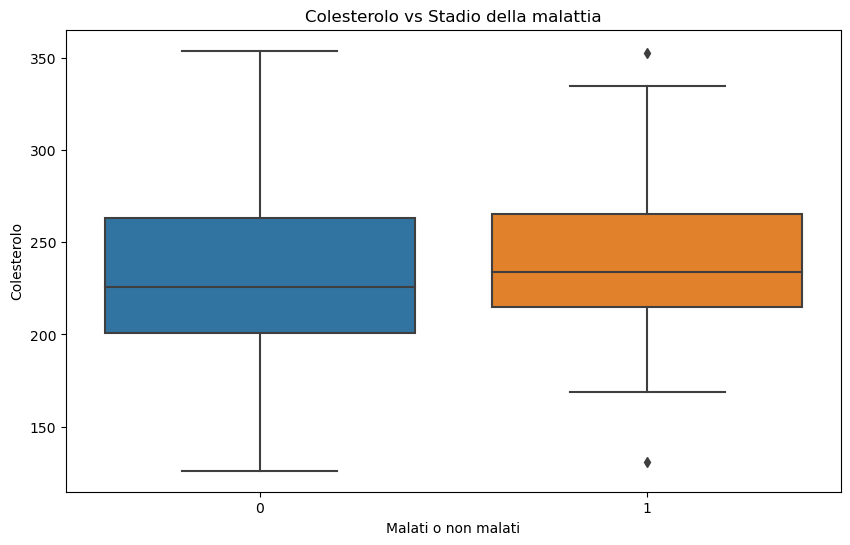

In [46]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['chol'] >= Q1 - 1.5 * IQR) & (df['chol'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num'], y=df['chol'])
plt.title('Colesterolo vs Stadio della malattia')
plt.xlabel('Malati o non malati')
plt.ylabel('Colesterolo')
plt.show()


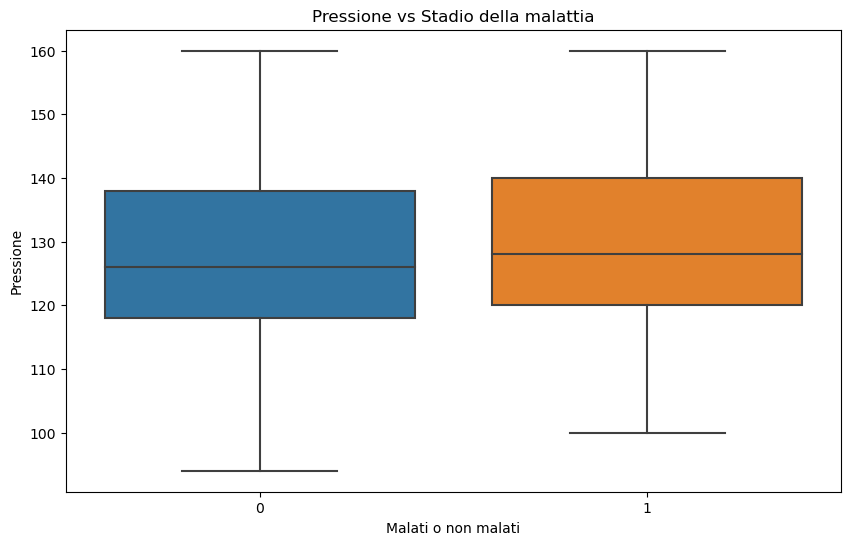

In [45]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['trestbps'] >= Q1 - 1.5 * IQR) & (df['trestbps'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num'], y=df['trestbps'])
plt.title('Pressione vs Stadio della malattia')
plt.xlabel('Malati o non malati')
plt.ylabel('Pressione')
plt.show()

## Grafico differenza maschio femmina

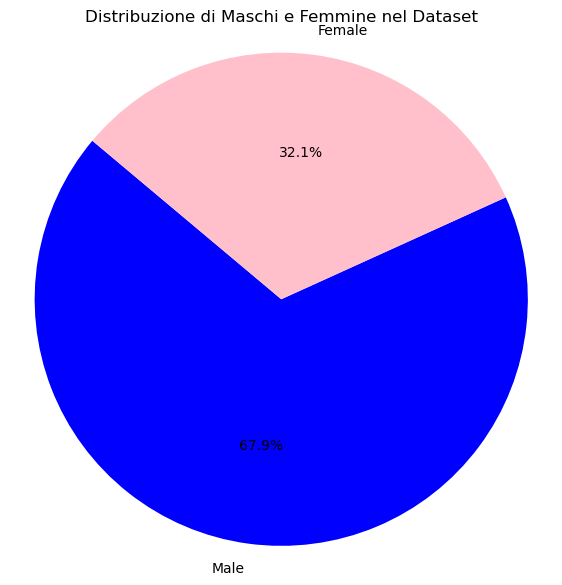

In [9]:
counts = df['sex'].value_counts()

labels = counts.index
sizes = counts.values
colors = ['blue', 'pink']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione di Maschi e Femmine nel Dataset')
plt.axis('equal')
plt.show()


In [10]:
counts = df['sex'].value_counts()

print("Numero di Donne nel Dataset:", counts['Female'])
print("Numero di Uomini nel Dataset:", counts['Male'])


Numero di Donne nel Dataset: 96
Numero di Uomini nel Dataset: 203


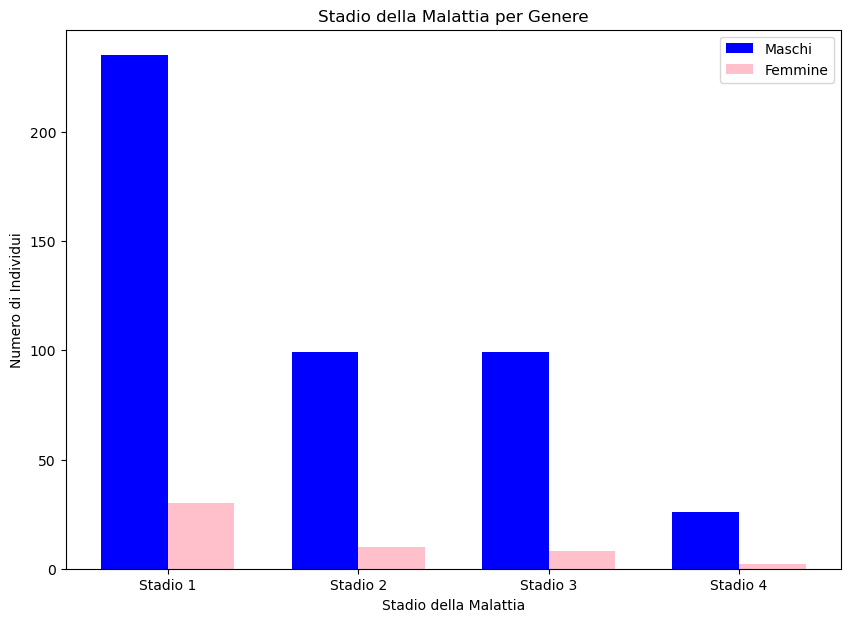

In [10]:
# Carica i dati
df = pd.read_csv('C:\\Users\\matti\\Downloads\\heart_disease_uci.csv')

# Filtra per sesso
male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

# Calcola il numero di individui per stadio della malattia per ciascun sesso
male_counts = male_data['num'].value_counts().sort_index()
female_counts = female_data['num'].value_counts().sort_index()

# Definisci i valori per l'asse x e y
stages = ['Stadio 1', 'Stadio 2', 'Stadio 3', 'Stadio 4']
male_values = [male_counts.get(stage, 0) for stage in range(1, 5)]
female_values = [female_counts.get(stage, 0) for stage in range(1, 5)]

# Crea il grafico a barre
plt.figure(figsize=(10, 7))
bar_width = 0.35
index = range(1, 5)

plt.bar(index, male_values, bar_width, label='Maschi', color='blue')
plt.bar([i + bar_width for i in index], female_values, bar_width, label='Femmine', color='pink')

plt.title('Stadio della Malattia per Genere')
plt.xlabel('Stadio della Malattia')
plt.ylabel('Numero di Individui')
plt.xticks([i + bar_width / 2 for i in index], stages)
plt.legend()
plt.show()

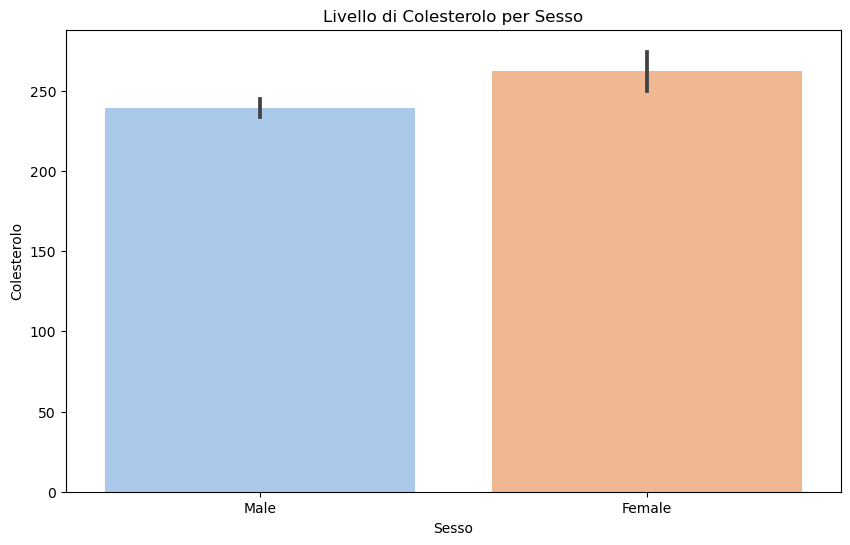

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='chol', data=df, palette='pastel')
plt.title('Livello di Colesterolo per Sesso')
plt.xlabel('Sesso')
plt.ylabel('Colesterolo')
plt.show()


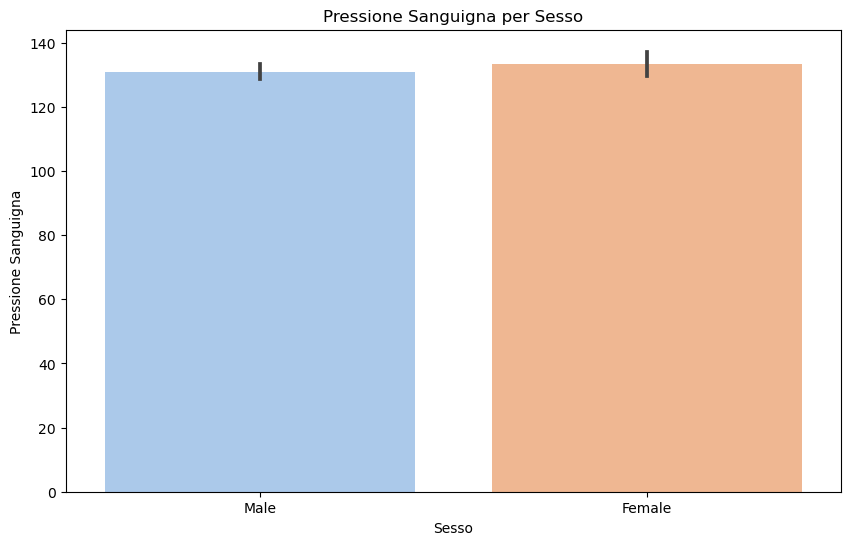

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='trestbps', data=df, palette='pastel')
plt.title('Pressione Sanguigna per Sesso')
plt.xlabel('Sesso')
plt.ylabel('Pressione Sanguigna')
plt.show()


### In questo grafico capiamo che i maschi sono più colpiti da malattie al cuore

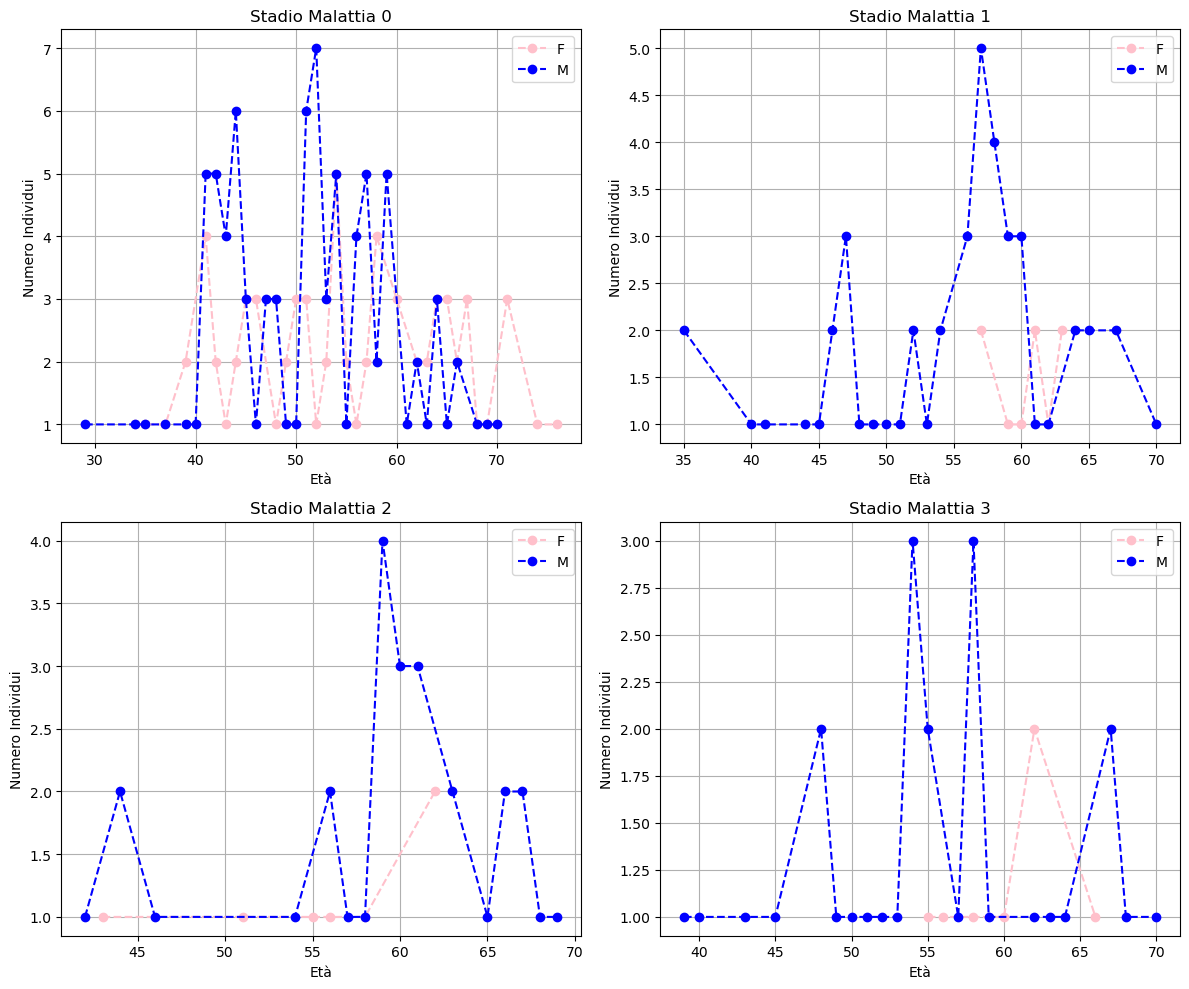

In [28]:
# Carica i dati
df = pd.read_csv('C:\\Users\\matti\\Downloads\\heart_disease_uci.csv')

# Filtra i dati rimuovendo le righe con valori mancanti
df.dropna(inplace=True)

# Filtra per sesso e stadio della malattia
male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

# Calcola il conteggio degli individui per ogni combinazione di età, sesso e stadio della malattia
male_counts = male_data.groupby(['age', 'num']).size().reset_index(name='count')
female_counts = female_data.groupby(['age', 'num']).size().reset_index(name='count')

# Unisci i due DataFrame
combined_counts = pd.concat([male_counts, female_counts])

# Aggiungi una colonna per distinguere tra maschi e femmine
combined_counts['sex'] = ['M'] * len(male_counts) + ['F'] * len(female_counts)

# Visualizza il grafico 2D
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for (num, group), ax in zip(combined_counts.groupby('num'), axes.flatten()):
    for sex, data in group.groupby('sex'):
        color = 'blue' if sex == 'M' else 'pink'
        ax.plot(data['age'], data['count'], marker='o', linestyle='--', label=sex, color=color)
    ax.set_title(f'Stadio Malattia {num}')
    ax.set_xlabel('Età')
    ax.set_ylabel('Numero Individui')
    ax.legend()
    ax.grid(True)

plt.tight_layout()

plt.show()




### Qua invece vediamo che la malattia si presenta più facilmente in maschi di età avanzata

## Ora creiamo dei traningset per riconoscere i malati dai sani

In [18]:
warnings.filterwarnings("ignore", category=FutureWarning)

df.dropna(inplace=True)
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
numeric_df = df.select_dtypes(include=['number'])
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

features = df[['sex_encoded', 'chol', 'trestbps', 'fbs']]
target = df['num']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.52      0.71      0.60        17

    accuracy                           0.69        52
   macro avg       0.67      0.70      0.68        52
weighted avg       0.73      0.69      0.70        52



In [21]:
warnings.filterwarnings("ignore", category=FutureWarning)

df.dropna(inplace=True)
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

numeric_df = df.select_dtypes(include=['number'])
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

stages_encoded = pd.get_dummies(df['num'], prefix='stages')

features_list = ['sex_encoded', 'chol', 'trestbps', 'fbs']
features = df[features_list].join(stages_encoded)
target = df['num']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

for stage in stages_encoded.columns:
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for stage {stage}:", accuracy)
    print(classification_report(y_test, y_pred))


Accuracy for stage stages_0: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        17

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy for stage stages_1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        17

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



###### gianpiero ha il cancro di lvl 69 rarità leggendaria